In [2]:
import itertools
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.layers import Flatten, Dense
from keras import Sequential
import numpy as np

from electf4 import make_circles, make_confusion_matrix

In [3]:
mnist = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
tf.random.set_seed(42)
modelx = Sequential([Flatten(input_shape = (28,28)),
                   Dense(10,activation = 'relu'),
                   Dense(10,activation = 'relu'),
                   Dense(10,activation = 'softmax')
                   ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1730737864.350996   23634 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1224 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
modelx.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,070 (31.52 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
modelx.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
optimizer = keras.optimizers.Adam(),
metrics = ['accuracy'])

In [7]:
th = modelx.fit(x_train, 
                y_train, 
                epochs = 10, 
                verbose = 1, 
                validation_data = (x_test,y_test))

Epoch 1/10


2024-11-04 23:31:29.414185: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2024-11-04 23:31:29.580530: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
I0000 00:00:1730737890.144498   23703 service.cc:148] XLA service 0x719570003e70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730737890.144519   23703 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2024-11-04 23:31:30.164799: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730737890.234356   23703 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-04 23:31:30.259512: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 

 224/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step - accuracy: 0.3435 - loss: 1.9185

I0000 00:00:1730737890.789081   23703 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6877 - loss: 0.9900 - val_accuracy: 0.8934 - val_loss: 0.3670
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.8998 - loss: 0.3479 - val_accuracy: 0.9086 - val_loss: 0.3115
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.9144 - loss: 0.2994 - val_accuracy: 0.9176 - val_loss: 0.2847
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.9222 - loss: 0.2705 - val_accuracy: 0.9243 - val_loss: 0.2630
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - accuracy: 0.9288 - loss: 0.2460 - val_accuracy: 0.9313 - val_loss: 0.2447
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - accuracy: 0.9333 - loss: 0.2286 - val_accuracy: 0.9349 - val_loss: 0.2325
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.9372 - loss: 0.2155 - val_accuracy: 0.9366 - val_loss: 0.2246
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - accuracy: 0.9405 - loss: 0.2059

In [8]:
y_probs = modelx.predict(x_test)
y_preds = y_probs.argmax(axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step


In [9]:
confusion_matrix(labels = y_test,
                 predictions = y_preds,
                 dtype = np.int32
                 )

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 949,    0,    6,    1,    2,    3,    7,    5,    7,    0],
       [   0, 1118,    3,    3,    0,    2,    2,    1,    5,    1],
       [   4,    1,  982,    7,    4,    1,    7,    8,   14,    4],
       [   0,    0,   20,  956,    1,    8,    0,    8,   12,    5],
       [   3,    1,    6,    1,  911,    0,   12,    5,    3,   40],
       [   8,    3,    6,   58,    6,  771,   10,    5,   20,    5],
       [   5,    4,   15,    1,   13,   10,  904,    0,    6,    0],
       [   1,    7,   19,    8,    1,    2,    0,  970,    2,   18],
       [   8,    5,   10,   21,    8,    9,    4,   11,  891,    7],
       [   4,    4,    2,   10,   14,    7,    1,   21,    1,  945]],
      dtype=int32)>

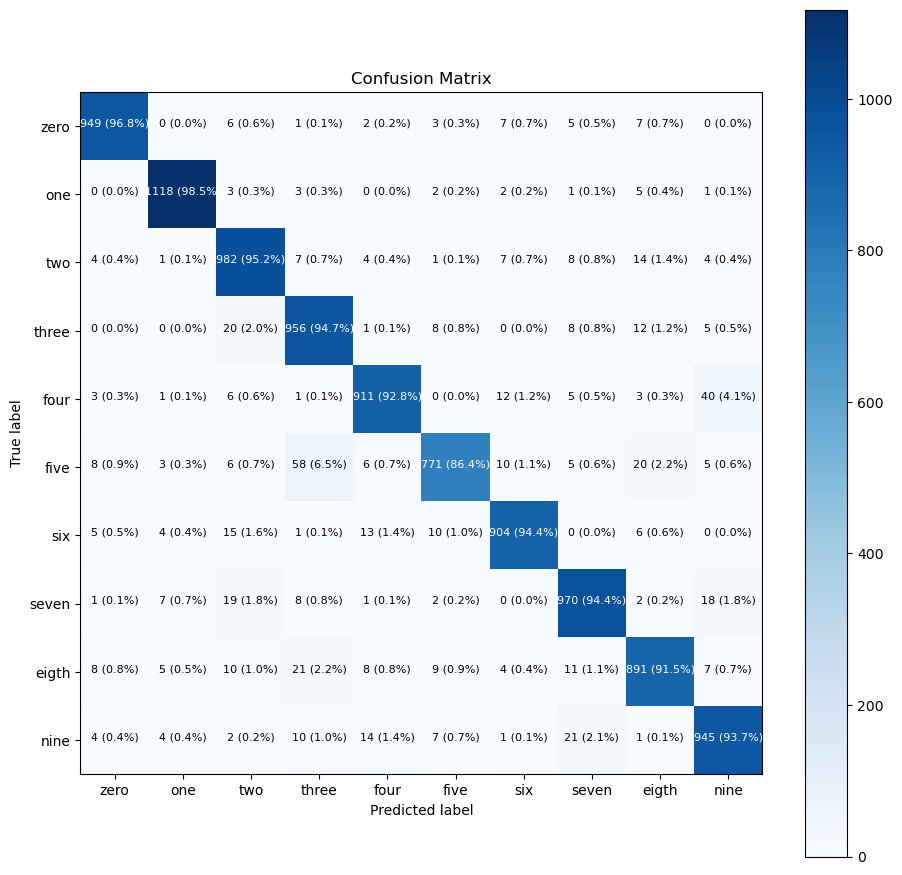

In [10]:
labels_name = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eigth", "nine"]
make_confusion_matrix(y_true = y_test,
                      y_pred = y_preds,
                      classes = labels_name,
                      figsize = (11, 11),
                      text_size = 8)